# Data Pre-processing Techniques

Data preprocessing involves several transformations that are applied to the raw data to make it more amenable for learning. It is carried out before using it for model training or prediction.

There are many pre-processing techniques for

* Data Cleaning
  * Data Imputation
  * Feature scaling

* Feature Transformation
  * Polynomial Features
  * Discretization
  * Handling categorical features
  * Custom Transformers
  * Composite Transformers
    * Apply transformation to diverse features
    * TargetTransformedRegresor
* Feature Selection
  * Filter based feature selection
  * Wrapper based feature selection
* Feature Extraction
  * PCA

The transformations are applied in a specific order and the order can be specified via $Pipeline$. We need to apply different transformations based on the feature type. FeatureUnion helps us perform that task and combine outputs from multiple transformations into a single transformed feature matrix. We will also study as how to visualize this pipeline.

# Importing basic Libraries

In this colab, we are importing libraries as needed. However it is a good practice to have all imports in one cell-arranged in an alphabetical order. This helps us weed out any duplicate imports and some such issues.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')

# **1. Feature Extraction**

## DictVectorizer

Many a times the data is present as a list of dictionary objects. ML algorithms expect the data in matrix form with shape (n,m) where n is the number of samples and m is the number of features.

DictVectorizer converts a list of dictionary objects to feature matrix.

Let's create a sample data for demo purpose containing age and height of children.

    Each record/sample is a dictionary with two keys age and height and corresponding values.

In [4]:
data = [{'age':4,'height':96.0},
        {'age':1,'height':73.9},
        {'age':3,'height':88.9},
        {'age':2,'height':81.6}]

There are 4 data samples with 2 features each.

Let's make use of DictVectorizer to convert the list of dictionary objects to the feature matrix.

In [5]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [6]:
data_transformed.shape

(4, 2)

The transformed data is in a feature matrix form-4 samples with 2 features each i.e. shape (4,2)

# **2. Data Imputation**

* Many machine learning algorithms need full feature matrix and they may not work in presence of missin data.
* Data imputation identifies missing values in each feature of the dataset and replaces them with an appropriate value based on a fixed strategy such as
  * mean or median or mode of that feature.
  * use specified constant value.

Sklearn library provides sklearn.impute.SimpleImputer class for this purpose.

In [7]:
from sklearn.impute import SimpleImputer

Some of its important parameters:

* missing_values: Could be int, float, str, np.nan or None. Default is np.nan
* strategy: string, default is 'mean'. One of following strategies can be used:

  * mean- missing values are replaced using the mean along each column.
  * median- missing values are replaced using the median along each column.
  * most_frequent- missing values are replaced using the most frequent along each column.
  * constant- missing values are replaced using the fill_value arguement.
* add_indicator is a boolean parameter that when set to True returns missing value indicators in indicator_ member variable.

Note:
* mean and median strategies can only be used with numeric data.
* most_frequent and constant strategies can be used with strings or numeric data.

## Data imputation on real world dataset

Let's perform data imputation on real world dataset. We will be using heart disease dataset from uci machine learning repo for this purpose. We will load this dataset from csv file.

In [8]:
cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None, names=cols)

The dataset has the following features:

    1. Age (in years)
    2. Sex (1=male; 0=female)
    3. cp - cheap pain type
    4. trestbps - resting blood pressure (anything above 130-140 is typically cause for concern)
    5. chol - serum cholestrol in mg/dl (above 200 is cause for concern)
    6. fbs -  fasting blood sugar (>120 mg/dl)(1=true;0=false)
    7. restecg - resting electrocardiographic results
      * 0=normal
      * 1=having ST-T wave abnormality
      * 2=showing probable or definite left ventricular hypertrophy by Estes' criteria
    8. thalach - maximum heart rate achieved
    9. exang - exercise induced angina
      * 1=yes
      * 0=no
    10. oldpeak - depression induced by exercise relative to rest
    11. slope - slope of peak exercise ST segment
      * 1=upsloping
      * 2=flat value
      * 3=downsloping
    12. ca = number of major vessels (0-3) colored by flourosopy
    13. thal - (3=normal; 6=fixed defect; 7=reversable defect)
    14. num - diagnosis of heart disease (angiographic disease status)
      *0: <50% diameter narrowing
      *1: >50% diameter narrowing

**STEP 1:** Check if the dataset contains missing values.

* This can be checked via dataset description or by check number of nan or np.null in the dataframe. However such a check can be performed only for numerical features.
* For non-numerical features, we can list their unique values and check if there are values like $?$.

In [9]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Let's check if there are any missing values in numerical columns-here we have checked it for all columns in the dataframe.

In [10]:
(heart_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

There are two non-numerical features: ca and thal.

* List their unique values

In [11]:
print(heart_data.ca.unique(),heart_data.thal.unique())

['0.0' '3.0' '2.0' '1.0' '?'] ['6.0' '3.0' '7.0' '?']


Both of them contain ?, which is a missing values. Let's count the number of missing values.

In [12]:
print(heart_data.loc[heart_data.ca=='?','ca'].count(),heart_data.loc[heart_data.thal=='?','thal'].count())

4 2


**Step 2:** Replace '?' with nan

In [13]:
heart_data.replace('?',np.nan,inplace=True)

**Step 3:** Fill the missing values with sklearn missing value imputation utilities

Here we use SimpleImputer with mean strategy.

We will try two variations-

* add_indicator = False: Default choice that only imputes missing values.

In [14]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
heart_data_imputed = pd.DataFrame(imputer.fit_transform(heart_data),columns=heart_data.columns)
print(heart_data_imputed.ca.unique(),heart_data_imputed.thal.unique())

[0.        3.        2.        1.        0.6722408] [6.         3.         7.         4.73421927]


* add_indicator = True: Adds additonal column for each column containing missing values, In our case, this adds two columns one for ca and other for thal. It indicates if the sample has missing value.

In [15]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',add_indicator = True)
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)

(303, 16)


# **3. Feature scaling**

Feature scaling transforms feature values such that all the features are on the same scale.

When we use feature matrix with all features on the same scale, it provides us certain advantages as listed below:

* Enables faster convergence in iterative optimization algorithms like gradient descent and its variants.
* The performance of ML algorithms such as SVM, K-NN and K-menas etc that compute euclidean distance among input samples gets impacted if the features are not scaled.

Tree based ML algorithms are not affected by feature-scaling. In other words, feature scaling is not required for tree based ML algorithms.

feature scaling can be performed with the following methods:

* Standardization
* Normalization
* MaxAbsScaler

Let's demonstrate feature scaling on a real world dataset. For this purpose we will be using ablone dataset. We will use different scaling utilities in sklearn library.

In [16]:
cols = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None, names=cols)

**Step 1:** Examine the dataset

Feature scaling is performed only on numerical attributes. Let's check which are numerical attributes in this dataset. We can get that via info() method

In [17]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**Step 1a:** [Optional]: Convert non-numerical attributes to numerical ones.

In this dataset, Sex is a non-numeric column in this dataset. Let's examine it and see if we can convert it to numeric representation.

In [18]:
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [19]:
abalone_data = abalone_data.replace({'Sex':{'M':1.,'F':2.,'I':3.}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   float64
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 293.8 KB


**Step 2:** Separate labels from features

In [20]:
y = abalone_data.pop('Rings')
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   float64
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(8)
memory usage: 261.2 KB


**Step 3:** Examine feature scales

Statistical method

Check the scales of different feature with describe() method of dataframe.

In [21]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


Note that

* There are 4177 examples or rows in this dataset.
* The mean and standard deviation of features are quite different from one another.

We can confirm that with a variety of visualization techniques and plots.

## Visualization of feature distributions

Visualize feature distributions

* Histogram
* Kernel density estimation KDE plot
* Box
* Violin

### Feature Histogram

We will have separate and combined histogram plots to check if the feature are indeed on different scales.

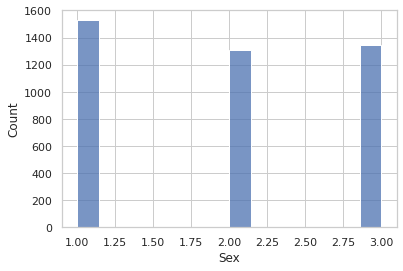

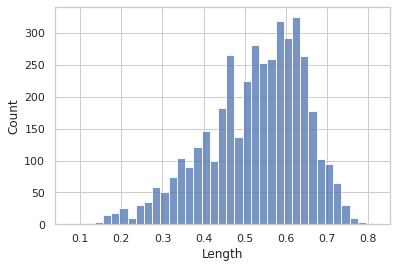

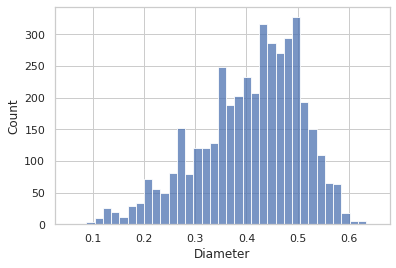

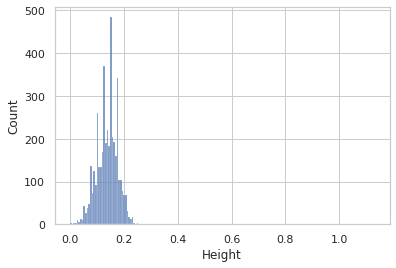

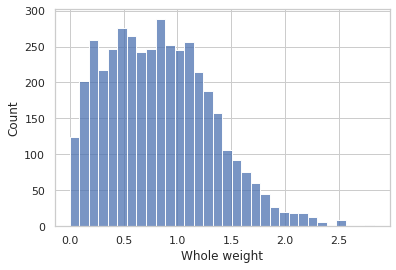

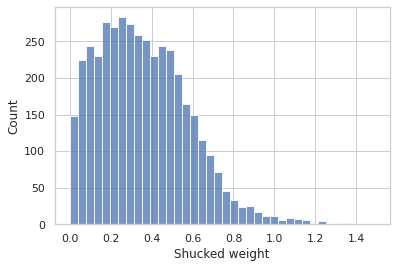

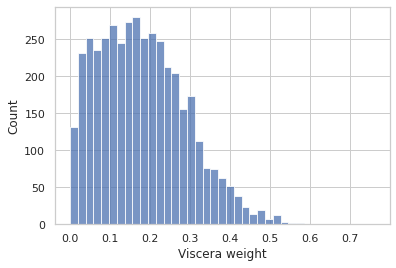

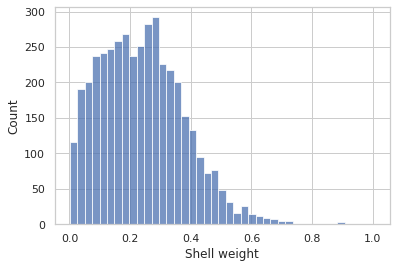

In [22]:
for i in cols[:-1]:
  sns.histplot(data=abalone_data[i])
  plt.show()

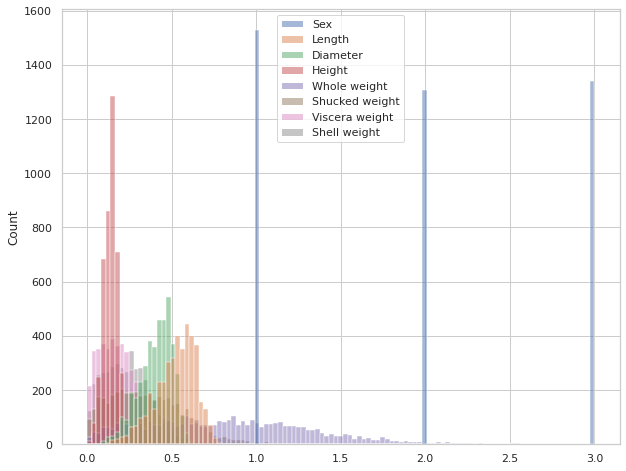

In [23]:
plt.figure(figsize=(10,8))
sns.histplot(data=abalone_data)

### KDE plot

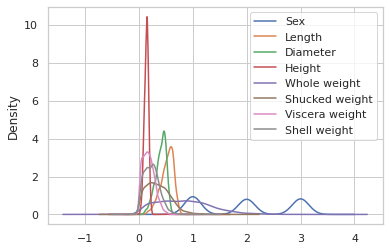

In [24]:
abalone_data.plot.kde()

### Box Plot

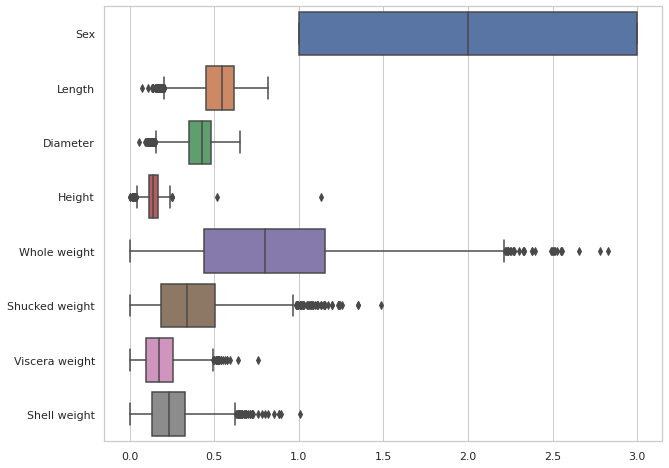

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(data=abalone_data, orient="h")

### Violin Plot

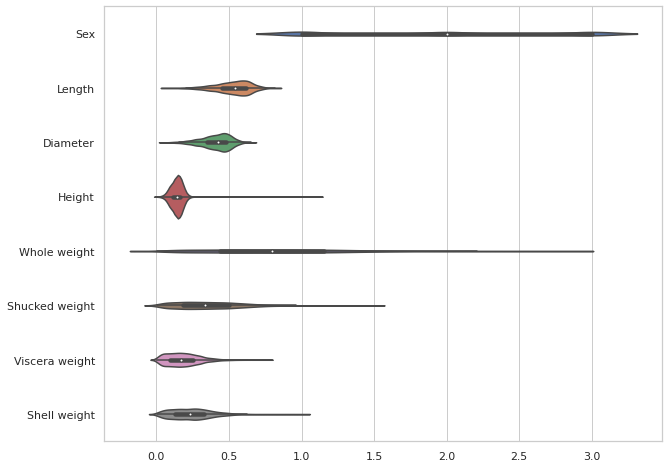

In [26]:
plt.figure(figsize=(10,8))
sns.violinplot(data=abalone_data, orient="h")

**Step 4:** Scaling

* Standardization : [-Inf,Inf]
* MaxAbsScaler : [-1,1]
* MinMaxScaler : [0,1]

In [27]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

x = np.array([-500,-100,0,5,50,100]).reshape(-1,1)
mas = MaxAbsScaler()
x_mas = mas.fit_transform(x)

mm = MinMaxScaler()
x_n = mm.fit_transform(x)

ss = StandardScaler()
x_s = ss.fit_transform(x)

print(x_mas)
print(x_n)
print(x_s)

[[-1.  ]
 [-0.2 ]
 [ 0.  ]
 [ 0.01]
 [ 0.1 ]
 [ 0.2 ]]
[[0.        ]
 [0.66666667]
 [0.83333333]
 [0.84166667]
 [0.91666667]
 [1.        ]]
[[-2.13129532]
 [-0.1292958 ]
 [ 0.37120408]
 [ 0.39622907]
 [ 0.62145402]
 [ 0.87170396]]


## Normalizing Abalone data

In [28]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
abalone_data_normalized = mm.fit_transform(abalone_data)

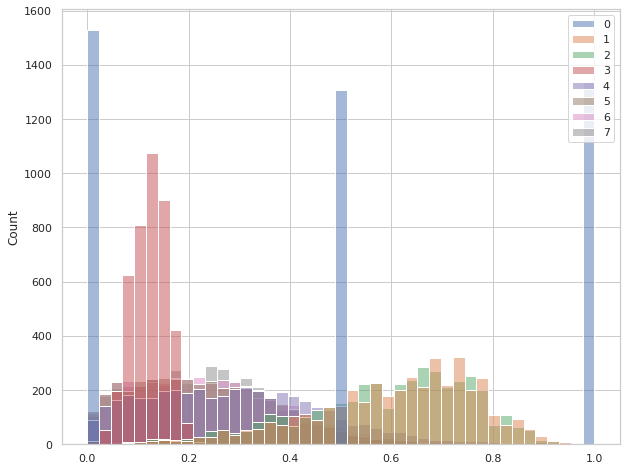

In [29]:
plt.figure(figsize=(10,8))
sns.histplot(data=abalone_data_normalized)

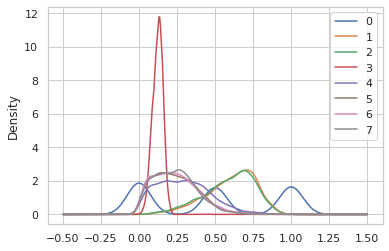

In [30]:
pd.DataFrame(abalone_data_normalized).plot.kde()

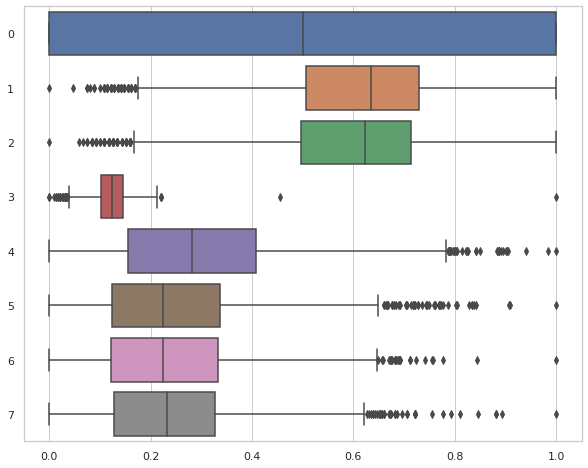

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(data=abalone_data_normalized, orient="h")

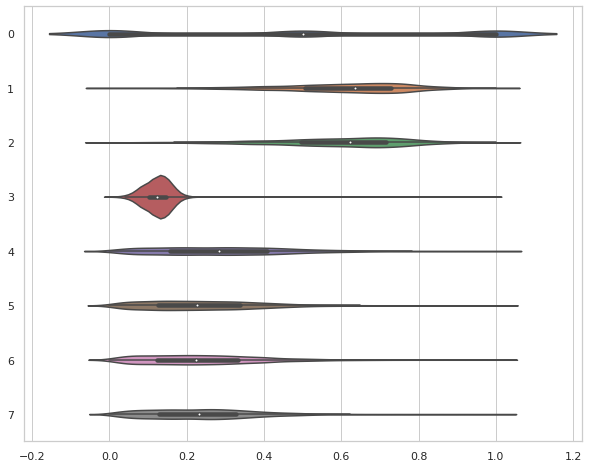

In [32]:
plt.figure(figsize=(10,8))
sns.violinplot(data=abalone_data_normalized, orient="h")

## Standardized Abalone Data

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
abalone_data_std = ss.fit_transform(abalone_data)

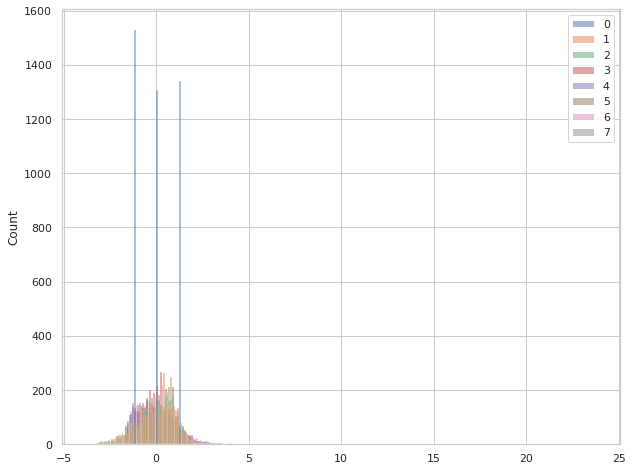

In [34]:
plt.figure(figsize=(10,8))
sns.histplot(data=abalone_data_std)

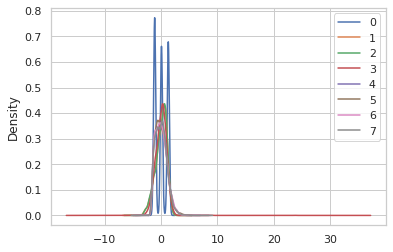

In [35]:
pd.DataFrame(abalone_data_std).plot.kde()

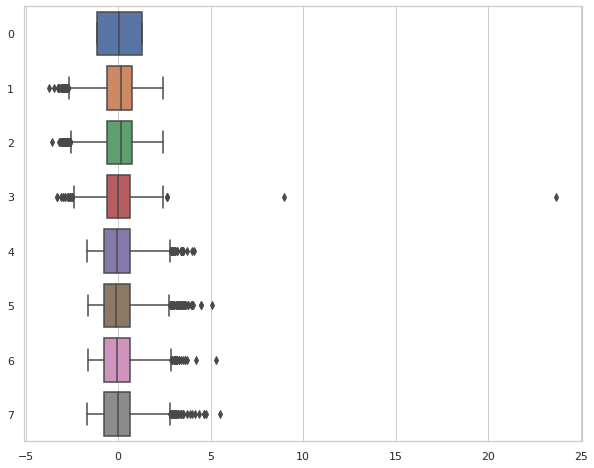

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(data=abalone_data_std, orient="h")

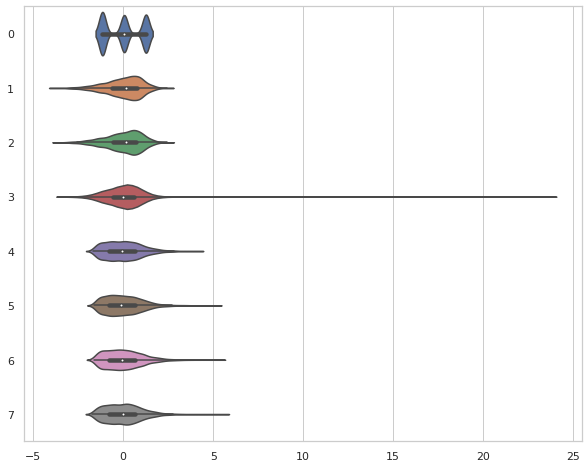

In [37]:
plt.figure(figsize=(10,8))
sns.violinplot(data=abalone_data_std, orient="h")

# **4. Dummy  Feature**

Augments dataset with a column vector, each value in the column vector is 1. This is useful for adding a parameter for bias term in the model.

In [38]:
x = np.array([[7,1],
              [1,8],
              [2,0],
              [9,6]])

from sklearn.preprocessing import add_dummy_feature

x_new = add_dummy_feature(x)
x_new

array([[1., 7., 1.],
       [1., 1., 8.],
       [1., 2., 0.],
       [1., 9., 6.]])

# **5. Custom transformers**

Enables conversion of an existing Python function into a tranformer to assist in data cleaning or processing.

Useful when:

1. The dataset consists of heterogeneous data type
2. The dataset is stored in a pandas dataframe and different columns require different processing pipelines
3. We need stateless transformations such as taking the log of frequencies , custom scaling etc

In [39]:
from sklearn.preprocessing import FunctionTransformer

You can implement a transformer from an arbitrary function with FunctionTransformer

In [40]:
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [41]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Let's use np.log1p which returns natural logarithm of 1+feature value

In [42]:
transformer = FunctionTransformer(np.log1p, validate=True)
wine_data_trasformed = transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_trasformed, columns=wine_data.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


# **6. Polynomial Features**


Generate a new feature consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

* For example, if an input sample is two dimensional and of the form [a,b], the degree-2 polynomial features are $[1,a,b,a^2 ,ab,b^2]$





In [43]:
from sklearn.preprocessing import PolynomialFeatures

wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
wine_data_copy = wine_data.copy()
wine_data = wine_data.drop(['quality'],axis=1)
print(wine_data.shape)

poly = PolynomialFeatures(degree=2)
poly_wine_data = poly.fit_transform(wine_data)
print(poly_wine_data.shape)

(1599, 11)
(1599, 78)


After transformation we have 78 features, let's list them out

In [44]:
poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

# **7. Discretization**

Discretization/quantization/binning provides a way to partition continuous features into discrete values.

In [45]:
from sklearn.preprocessing import KBinsDiscretizer

Let us demonstrate KBinsDiscretizer using wine quality dataset.

In [46]:
wine_data = wine_data_copy.copy()

enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X=np.array(wine_data['chlorides']).reshape(-1,1)
X_binned = enc.fit_transform(X)
X_binned

<1599x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

In [47]:
X_binned.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

# **8. Handling Categorical Features**

## Ordinal, one-hot and label encoder

We need to convert the categorical features into numerical features

1. Ordinal encoding
2. One-Hot encoding
3. Label encoder
4. Using dummy variables

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

#data
cols = ['sepal length','sepal width','petal length','petal width','label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None, names=cols)
iris_labels = np.array(iris_data['label'])
movie_genres = [{'action','comedy'},{'comedy'},{'action','thriller'},{'science-fiction','action','thriller'}]

#One hot encoding
ohe = OneHotEncoder(categories='auto')
iris_ohe = ohe.fit_transform(iris_data.label.values.reshape(-1,1))
print('One Hot Encoding')
print(iris_ohe.toarray())

#Ordinal encoding
oe = OrdinalEncoder()
iris_labels_transformed = oe.fit_transform(iris_labels.reshape(-1,1))
print('Ordinal Encoding')
print(np.unique(iris_labels_transformed))
print(iris_labels_transformed)

#Label encoding
le = LabelEncoder()
label_integer = le.fit_transform(iris_labels)
print('Label Encoding')
print(label_integer)

#Multilabel binarizer
mlb = MultiLabelBinarizer()
print('Multi Label Encoding')
print(mlb.fit_transform(movie_genres))

One Hot Encoding
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]

## Using dummy variables

In [49]:
iris_data_onehot = pd.get_dummies(iris_data, columns=['label'],prefix=['one_hot'])
iris_data_onehot

,sepal length,sepal width,petal length,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


# **9. Composite Transformers**

## ColumnTransformer

It applies a set of transformers to columns of an array or pandas.DataFrame, concatanates the transformed outputs from different transformers into a single matrix.

* It is useful for transforming heterogenous data by applying different transformers to separate subsets of features.
* It combines different feature selection mechanisms and transformation into a single transformer object.

In [50]:
x = [[20.0,'male'],
     [11.0,'female'],
     [15.6,'female'],
     [13.0,'male'],
     [18.6,'male'],
     [16.4,'female']]
x = np.array(x)

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder

ct = ColumnTransformer([('scaler',MaxAbsScaler(),[0]),
                        ('pass','passthrough',[0]),
                        ('encoder',OneHotEncoder(),[1])])
ct.fit_transform(x)

array([['1.0', '20.0', '0.0', '1.0'],
       ['0.55', '11.0', '1.0', '0.0'],
       ['0.78', '15.6', '1.0', '0.0'],
       ['0.65', '13.0', '0.0', '1.0'],
       ['0.93', '18.6', '0.0', '1.0'],
       ['0.82', '16.4', '1.0', '0.0']], dtype='<U32')

## TransformedtargetRegressor

In [52]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

X,y = fetch_california_housing(return_X_y=True)
X,y = X[:2000,:], y[:2000]

transformer = MaxAbsScaler()

regressor = LinearRegression()

regr = TransformedTargetRegressor(regressor=regressor,transformer=transformer)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
raw_target_regr = LinearRegression().fit(X=X_train,y=y_train)
print(raw_target_regr.score(X_test,y_test))

0.5852954114112681
0.5852954114112681


# **10. Feature Selection**

sklearn.feature_selection module has useful APIs to select features/reduce dimensionality, either to improve estimators accuracy scores or to boost their performance on very high-dimensional datasets.

##Filter based methods

###VarianceThreshold

This transformer helps to keep only high variance features by providing a certain threshold.

Features with variance greater or equal to threhold value are kept rest are removed.

By default it removes any feature with same value ie 0 variance

In [53]:
data = [{'age':4,'height':96.0},
        {'age':1,'height':73.9},
        {'age':3,'height':88.9},
        {'age':2,'height':81.6}]

dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
np.var(data_transformed, axis=0)

array([ 1.25 , 67.735])

In [54]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=9)
data_new = vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

As you may observe from output of above cell, the transformer has removed the age feature because its variance is below he threshold.

###SelectKBest

It selects k highest scoring features based on a function and removes the rest of the features.
Lets take an example of California Housing dataset.

In [55]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression

X_cal, y_cal = fetch_california_housing(return_X_y=True)

X,y = X_cal[:2000,:], y_cal[:2000]

X.shape

(2000, 8)

Let's take 3 most important features, since it is a regression problem, we can use mutual_info_regression or f_regression scoring functions only.

In [56]:
skb = SelectKBest(mutual_info_regression, k=3)
X_new = skb.fit_transform(X,y)
X_new.shape

(2000, 3)

In [57]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

### SelectPercentile

This is very similar to SelectKBest from previous section

In [58]:
from sklearn.feature_selection import SelectPercentile
sp = SelectPercentile(mutual_info_regression, percentile=30)
X_new = sp.fit_transform(X,y)
X_new.shape

(2000, 3)

In [59]:
sp.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

### GenericUnivariateSelect

It applies univariate feature selection with a certain strategy, which is passed to the API via mode parameter, mode can take one of the following values: percentile,k_best,fpr,fdr,fwe

for similar to SelectKBest results, below is the code

In [60]:
from sklearn.feature_selection import GenericUnivariateSelect

gud = GenericUnivariateSelect(mutual_info_regression, mode = 'k_best', param=3)
X_new = gud.fit_transform(X,y)
X_new.shape

(2000, 3)

## Wrapper based methods

### RFE [recursive feature elimination]

first fit, remove least ranked feature

In [61]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3,step=1)
selector = selector.fit(X,y)
print(selector.support_)
print(selector.ranking_)

[ True False False False False False  True  True]
[1 5 4 3 6 2 1 1]


### RFE-CV

to add another layer of cross_validation to RFE

### SelectFromModel

Select desired no of important features above certain threshold of feature importance as obtained from trained estimator.

In [62]:
from sklearn.feature_selection import SelectFromModel

estimator = LinearRegression()
estimator.fit(X,y)
print(estimator.coef_)
print(np.argsort(estimator.coef_)[-3:])
t=np.argsort(np.abs(estimator.coef_))[-3:]
model = SelectFromModel(estimator, max_features=3,prefit=True)
X_new = model.transform(X)
print(X_new.shape)

[ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
[1 2 0]
(2000, 3)


### SequentialFeatureSelection

It performs feature selection by selecting or deselecting or deselecting features one by one in a greedy manner.

In [63]:
from sklearn.feature_selection import SequentialFeatureSelector

In [64]:
%%time
estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
sfs.fit_transform(X,y)
sfs.get_support()

CPU times: user 269 ms, sys: 22.1 ms, total: 291 ms
Wall time: 304 ms


The features corresponding to True in the output

In [65]:
%%time
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, direction='backward')
sfs.fit_transform(X,y)
sfs.get_support()

CPU times: user 438 ms, sys: 161 ms, total: 599 ms
Wall time: 567 ms


# **11. PCA**

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that capture maximum amount of variance.

It helps in reducing dimensions of a dataset, thus computational cost of next steps, eg training a model, cross validation etc

Let's fit a PCA transformer on this data and compute its two principal components

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
print(pca.fit(X))
print(pca.components_)
print(pca.explained_variance_)
print(pca.mean_)

PCA(n_components=2)
[[ 3.58746278e-04 -5.26626273e-03 -3.55739438e-04 -1.04636644e-04
   9.99985993e-01  1.07189337e-04 -3.72926795e-05 -3.18638902e-05]
 [ 2.83042309e-02 -9.96787172e-01  7.04618553e-02  1.11176863e-02
  -5.23215008e-03 -1.02817045e-03  1.45200590e-02  1.69252465e-02]]
[9.32990794e+05 1.72499472e+02]
[ 3.88541705e+00  3.13105000e+01  5.89404425e+00  1.15137723e+00
  1.24335450e+03  2.72214812e+00  3.80665650e+01 -1.21940045e+02]


Reduced dimensions

In [67]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print(X.shape,X_pca.shape)

(2000, 8) (2000, 1)


# **12. Chaining Transformers**

## Pipeline

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
estimators = [('simpleimputer', SimpleImputer()),
              ('standardscaler', StandardScaler()),]
pipe = Pipeline(steps=estimators)

## make_pipeline
same can be done via make_pipeline

In [69]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(SimpleImputer(),
                     StandardScaler())

## GridSearch with pipeline

by using naming convention of nested parameters, grid search can be implemented

In [70]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = dict(imputer=['pasthrough',
                           SimpleImputer(),
                           KNNImputer()],
                  clf = [SVC(), LogisticRegression()],
                  clf__C=[0.1,10,100])
grid_search = GridSearchCV(pipe, param_grid=param_grid)

c is an inverse of regularization, lower its value stronger the regularization

In this example clf__C provides a set of values for grid search.

## Caching Transformers

Transforming data is a computationally expensive step.

* for grid search, transformers need not be applied for every parameter configuration. They can be applied only once, and the transformed data can be reused.

In [71]:
import tempfile
tempDirPath = tempfile.TemporaryDirectory()

estimators = [('simpleimputer', SimpleImputer()),
              ('pca', PCA()),
              ('regressor',LinearRegression())]
pipe = Pipeline(steps=estimators, memory=tempDirPath)

## FeatureUnion

Concatanates results of multiple transformer objects

# **13. Visualizing Pipelines**

In [72]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('selector', ColumnTransformer([('select_first_4',
                                                          'passthrough',
                                                          slice(0.4))])),
                         ('imputer',SimpleImputer(strategy = 'median')),
                         ('std_scaler', StandardScaler()),
                         ])
cat_pipeline = ColumnTransformer([('label_binarizer', LabelBinarizer(),[4]),])
full_pipeline = FeatureUnion(transformer_list = [('num_pipeline',num_pipeline),
                                                 ('cat_pipeline',cat_pipeline),
                                                 ])

In [73]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(None, 0.4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

# **14. Handling imbalanced data**

Imbalanced datasets are those where one class is very less represented than other classes

Two main approaches to handle imbalanced data

* Undersampling
* Oversampling

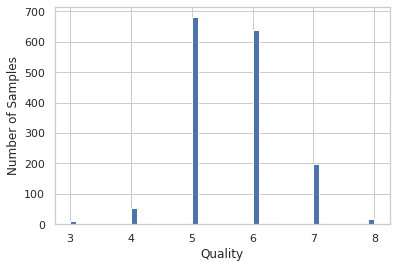

In [74]:
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel('Number of Samples')
plt.show()

## Undersampling

In [75]:
from imblearn.under_sampling import RandomUnderSampler

class_count_3,class_count_4,class_count_5,class_count_6,class_count_7,class_count_8 = wine_data['quality'].value_counts()

class_3 =  wine_data[wine_data['quality']==3]
class_4 =  wine_data[wine_data['quality']==4]
class_5 =  wine_data[wine_data['quality']==5]
class_6 =  wine_data[wine_data['quality']==6]
class_7 =  wine_data[wine_data['quality']==7]
class_8 =  wine_data[wine_data['quality']==8]

print('class 3:', class_3.shape)
print('class 4:', class_4.shape)
print('class 5:', class_5.shape)
print('class 6:', class_6.shape)
print('class 7:', class_7.shape)
print('class 8:', class_8.shape)

from collections import Counter
X=wine_data.drop(['quality'], axis=1)
y=wine_data['quality']
undersample = RandomUnderSampler(random_state=0)
X_runs,y_runs = undersample.fit_resample(X,y)
print(Counter(y),Counter(y_runs))

class 3: (10, 12)
class 4: (53, 12)
class 5: (681, 12)
class 6: (638, 12)
class 7: (199, 12)
class 8: (18, 12)
Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10}) Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


## OverSampling

In [76]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros,y_ros = ros.fit_resample(X,y)
print(Counter(y),Counter(y_ros))

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10}) Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


## Oversampling using SMOTE

SMOTE Synthetic minotiry Oversampling Technique is a popular technique for oversampling. It is available under imblearn library

In [77]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X,y)
counter = Counter(y_sm)
counter

Counter({3: 681, 4: 681, 5: 681, 6: 681, 7: 681, 8: 681})

Types of smote:

* Borderline SMOTE
* Borderline-SMOTE SVM
* Adaptive Synthetic Sampling (ADASYN)